# Complete Implementation of PCA with Scikit-learn

Scikit-learn provides several algorithms in terms of dimensionality reduction. However, there are some limitations when it comes to PCA. Scikit-learn does not provide full features of PCA such as loadings and biplot. It requires a manual implementation if you want to use that functions. The attributes of the PCA class is not intuitive and ambiguous as well. I implemented full characteristics of PCA with scikit-learn, wrote some simple examples and made it reusable.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

## Data Loading

I am going to use one of toy data sets from scikit-learn.

https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset

This data consists of 3 classes of response variables and 13 predictors.

In [2]:
data = load_wine(as_frame=True, return_X_y=True)

In [3]:
X = data[0]
y = data[1]

In [4]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [6]:
y.unique()

array([0, 1, 2])

In [7]:
df = pd.concat([y, X], axis=1)
df.head()

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Data Processing

### Distribution

There are some skewed variables, but transformation will not be applied.

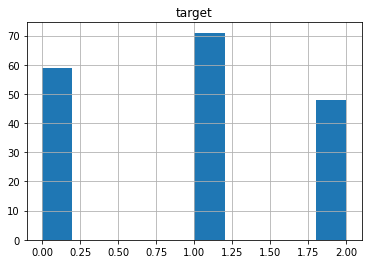

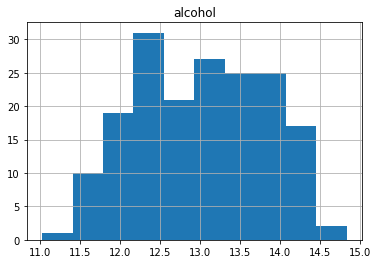

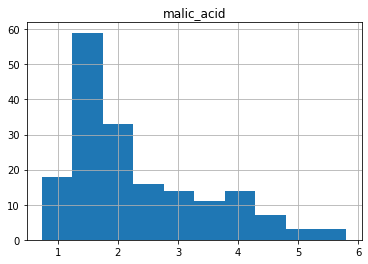

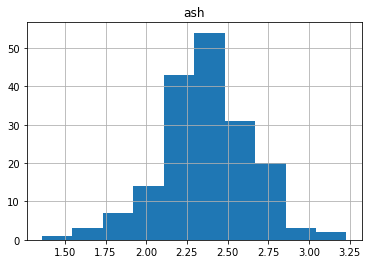

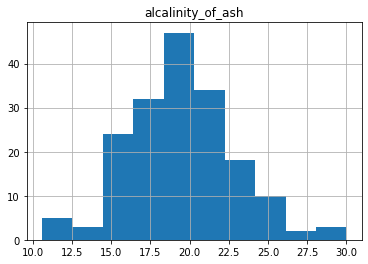

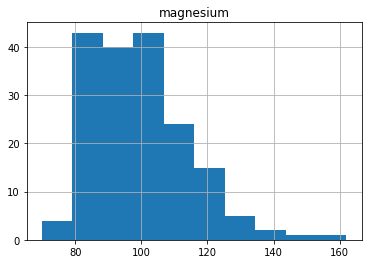

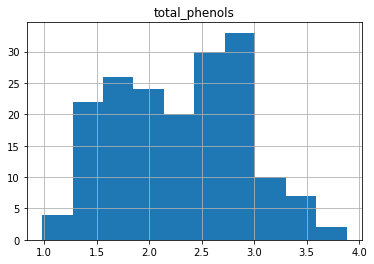

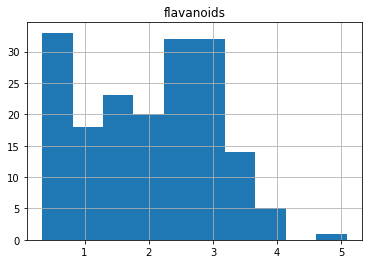

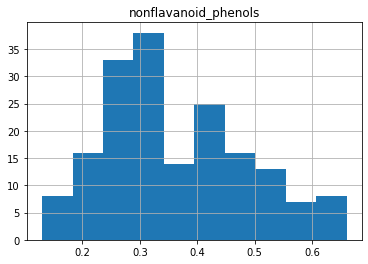

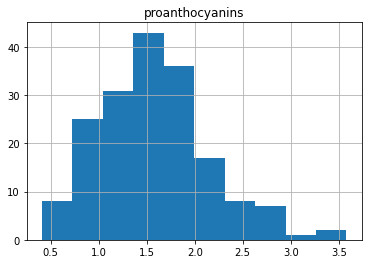

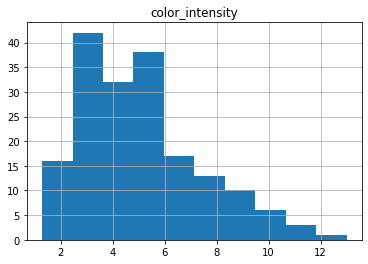

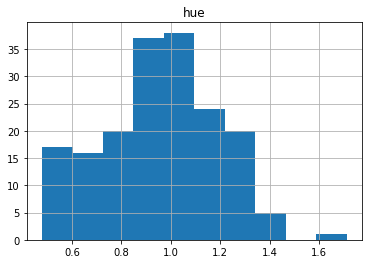

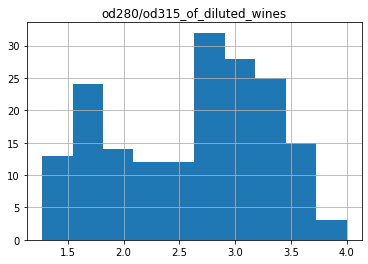

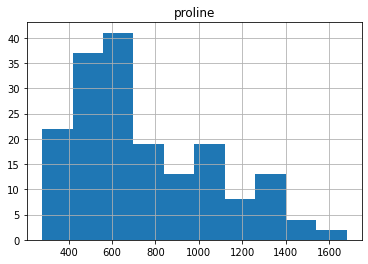

In [8]:
for col in df.columns:
    df[col].hist()
    plt.title(col)
    plt.show()

In [9]:
# response variable
y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

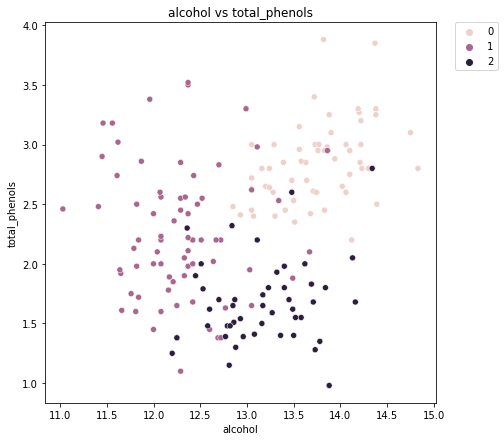

In [10]:
# simple plot
plt.figure(figsize=(7, 7))
sns.scatterplot(x='alcohol', y='total_phenols', data=df, hue='target')
plt.xlabel('alcohol')
plt.ylabel('total_phenols')
plt.title('alcohol vs total_phenols')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

This is a sample plot to see the relationship between 2 randomly selected variables with colored labels. We can find a clear distinction between classes.

### Scaling

In [11]:
X_std = StandardScaler().fit_transform(X)

In [12]:
X_cols = df.columns

## PCA Transformation

In [13]:
pca = PCA(n_components=X_std.shape[-1])
X_embed = pca.fit_transform(X_std)
print(pca.explained_variance_)

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]


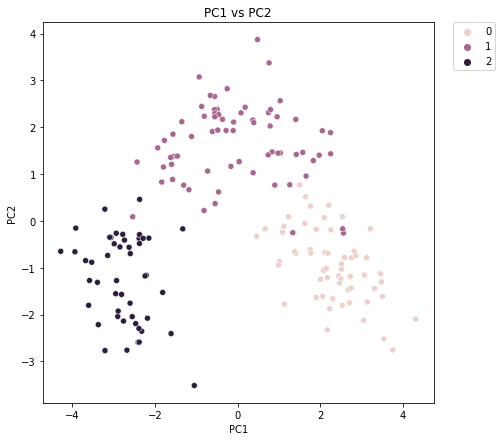

In [14]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x=X_embed[:, 0], y=X_embed[:, 1], hue=df['target'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

We can find that classes are clearly divided by using 2 PCs.

## Biplot

### Stratified random sampling to plot labels on the biplot

Since the number of data for each class is different, if we do random sampling, the chance of selecting a minor class will be reduced, so we do stratified random sampling.

However, for this wine data, the difference among the number of classes is not huge, and the total number of rows is also small. So, this part is not important.

In [15]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=24)
for train, test in sss.split(list(range(len(X_embed[:, 0]))), df['target']):
    x_ind = test

In [16]:
# the class names will be overlayed on these selected observations
x_ind

array([ 89, 136, 128,  23,   0,  70, 173,  95,  35,   1,  62,  98, 157,
        36,  86, 164,   3, 138,  54,  34, 113,  93,  63,   4,  17, 169,
       125,  80, 102, 104, 150,  15, 147, 139,  47, 163])

### Define a function for biplot

In [17]:
def biplot(x, y, hue, pca_obj, overlay_labels=None, overlay_idx=None, labels=None, text_color='g', arrow_color='b', text_show=True, figsize=(12,12)):
    plt.figure(figsize=figsize)
    # scaled_x = x/(x.max()-x.min())
    # scaled_y = y/(y.max()-y.min())
    max_range = np.max([x.max(), y.max()])+0.5

    # eigenvectors
    eigen = pca_obj.components_
    n = eigen.shape[1]
    
    # loadings
    loadings = eigen.T * np.sqrt(pca_obj.explained_variance_)
    
    sns.scatterplot(x=x, y=y, hue=hue)
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0, fontsize=12)
    
    # label
    boxstyle = dict(boxstyle='round', ec='gray', fc='white')
    if text_show is True and overlay_labels is not None and overlay_idx is not None:
        for i in overlay_idx:
            plt.text(x[i], y[i], overlay_labels[i], color='black', ha='center', va='center', alpha=1, bbox=boxstyle, fontsize=12)

    for i in range(n):
        vec_x = loadings[i, 0]*max_range*0.8
        vec_y = loadings[i, 1]*max_range*0.8
        plt.arrow(0, 0, vec_x, vec_y, color=arrow_color, alpha=0.8, head_width=0.1, head_length=0.1, zorder=100)
        if labels is None:
            plt.text(vec_x, vec_y*1.08, f'Var{i}', color=text_color, ha='center', va='center', fontsize=12)
        else:
            plt.text(vec_x, vec_y*1.08, labels[i], color=text_color, ha='center', va='center', fontsize=12, zorder=100)
    plt.xlabel(f'PC1 - {np.round(pca_obj.explained_variance_[0], 2)} ({np.round(pca_obj.explained_variance_[0]/np.sum(pca_obj.explained_variance_)*100, 2)}%)')    
    plt.xlabel(f'PC2 - {np.round(pca_obj.explained_variance_[1], 2)} ({np.round(pca_obj.explained_variance_[1]/np.sum(pca_obj.explained_variance_)*100, 2)}%)')
    plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
    plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    plt.title('Biplot')
    plt.show()


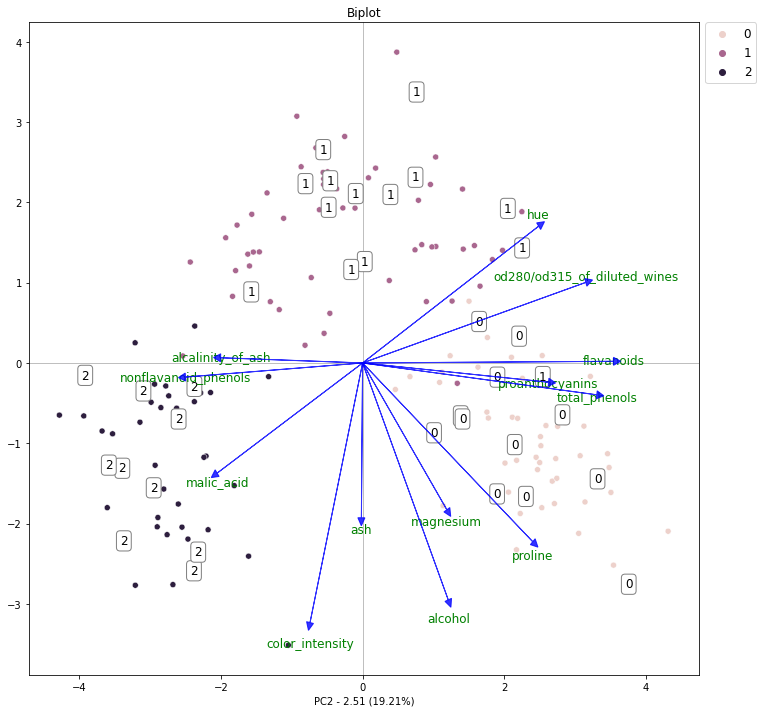

In [18]:
biplot(x=X_embed[:, 0], y=X_embed[:, 1], pca_obj=pca, overlay_labels=df['target'], overlay_idx=x_ind, hue=df['target'], labels=X.columns)

## Eigenvectors

Eigenvectors indicates the direction of each principle component.

In [19]:
eigenvectors = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{x+1}' for x in range(X_embed.shape[-1])]).T
eigenvectors

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605,-0.225917,-0.266286,0.014970
malic_acid,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080,0.076486,0.121696,0.025964
ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125,-0.498691,-0.049622,-0.141218
alcalinity_of_ash,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799,0.479314,-0.055743,0.091683
magnesium,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870,0.071289,0.062220,0.056774
total_phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131,0.304341,-0.303882,-0.463908
flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151,-0.025694,-0.042899,0.832257
nonflavanoid_phenols,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,0.595447,0.233285,0.195501,0.215535,0.116896,0.042352,0.114040
proanthocyanins,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184,-0.237363,-0.095553,-0.116917
color_intensity,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644,-0.227712,0.033797,0.056218,-0.290775,0.031839,0.604222,-0.011993


## Eigenvectors$^2$

### Variable Contributions to Principle Components

It shows proportions of the contributions of variables to each principle component.

In [20]:
var_cont = eigenvectors.pow(2)
var_cont

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,0.020831,0.233919,0.043008,0.000319,0.070577,0.045599,0.003181,0.156926,0.258693,0.044777,0.051038,0.070908,0.000224
malic_acid,0.060117,0.050594,0.007923,0.288251,0.001240,0.288169,0.176840,0.004333,0.005668,0.095530,0.005850,0.014810,0.000674
ash,0.000004,0.099899,0.392156,0.045871,0.020456,0.023862,0.022252,0.028988,0.094676,0.000736,0.248693,0.002462,0.019943
alcalinity_of_ash,0.057274,0.000112,0.374642,0.003704,0.004370,0.010166,0.082351,0.183158,0.040180,0.002788,0.229742,0.003107,0.008406
magnesium,0.020162,0.089781,0.017097,0.123761,0.528600,0.001455,0.104254,0.024449,0.073659,0.004606,0.005082,0.003871,0.003223
total_phenols,0.155757,0.004230,0.021368,0.039231,0.022296,0.007077,0.000780,0.164782,0.081816,0.102484,0.092624,0.092345,0.215211
flavanoids,0.178873,0.000011,0.022705,0.023194,0.011887,0.000358,0.003683,0.035061,0.002458,0.026618,0.000660,0.001840,0.692652
nonflavanoid_phenols,0.089122,0.000828,0.029025,0.041331,0.250703,0.066871,0.354557,0.054422,0.038221,0.046455,0.013665,0.001794,0.013005
proanthocyanins,0.098238,0.001545,0.022337,0.159246,0.018731,0.284938,0.138488,0.135591,0.043742,0.018005,0.056341,0.009130,0.013670
color_intensity,0.007853,0.280895,0.018853,0.004346,0.005843,0.175263,0.051853,0.001142,0.003160,0.084550,0.001014,0.365084,0.000144


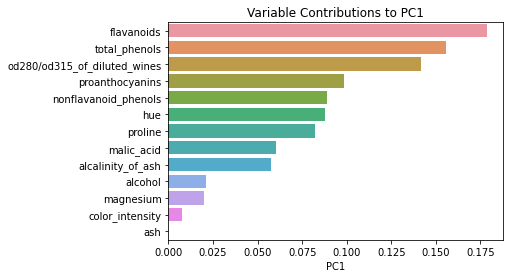

In [21]:
sns.barplot(y='index', x='PC1', data=var_cont.reset_index().sort_values(by='PC1', ascending=False))
plt.ylabel('')
plt.title('Variable Contributions to PC1')
plt.show()


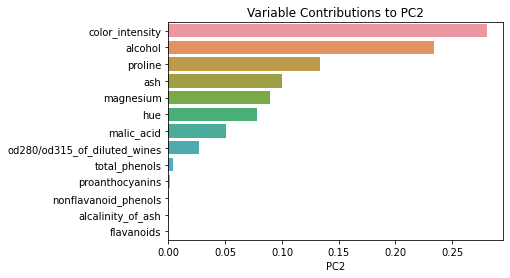

In [22]:
sns.barplot(y='index', x='PC2', data=var_cont.reset_index().sort_values(by='PC2', ascending=False))
plt.ylabel('')
plt.title('Variable Contributions to PC2')
plt.show()


## Eigenvalues

In [23]:
eigenvalues = pd.DataFrame(pca.explained_variance_.reshape(1, -1), columns=[f'PC{x+1}' for x in range(X_embed.shape[-1])])
eigenvalues

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,4.732437,2.511081,1.454242,0.924166,0.858049,0.645282,0.554141,0.350466,0.290512,0.25232,0.227064,0.169724,0.103962


## Loadings

\begin{align}
     Loadings = Eigenvectors^T * \sqrt{Eigenvalues} 
\end{align}

It reflects magnitudes to eigenvectors.

In [24]:
loadings = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_), index=X.columns, columns=[f'PC{x+1}' for x in range(X_embed.shape[-1])])
loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,0.313977,-0.766413,-0.250087,-0.017166,-0.246087,-0.171534,-0.041982,-0.234515,0.274141,0.106292,-0.107652,-0.109703,0.004827
malic_acid,-0.533385,-0.356434,0.107342,0.516132,0.032619,-0.431220,0.313041,-0.038970,-0.040577,-0.155255,0.036446,0.050136,0.008372
ash,-0.004462,-0.500855,0.755176,-0.205895,-0.132486,-0.124089,-0.111044,0.100794,-0.165845,-0.013625,-0.237633,-0.020443,-0.045533
alcalinity_of_ash,-0.520622,0.016782,0.738120,0.058506,0.061232,0.080992,-0.213622,-0.253359,0.108041,0.026522,0.228399,-0.022965,0.029561
magnesium,0.308892,-0.474812,0.157682,-0.338195,0.673472,-0.030641,0.240357,0.092566,0.146284,0.034092,0.033970,0.025633,0.018306
total_phenols,0.858552,-0.103064,0.176280,0.190410,-0.138315,0.067575,-0.020788,0.240314,0.154170,-0.160807,0.145022,-0.125192,-0.149578
flavanoids,0.920058,0.005324,0.181710,0.146406,-0.100992,0.015198,-0.045174,0.110850,0.026722,-0.081953,-0.012244,-0.017673,0.268346
nonflavanoid_phenols,-0.649434,-0.045605,0.205450,-0.195440,-0.463806,0.207727,0.443255,0.138105,0.105374,0.108266,0.055702,0.017448,0.036770
proanthocyanins,0.681840,-0.062279,0.180230,0.383627,0.126775,0.428795,0.277023,-0.217991,-0.112727,0.067403,-0.113106,-0.039365,-0.037698
color_intensity,-0.192778,-0.839852,-0.165580,0.063377,-0.070804,0.336295,-0.169510,0.020008,0.030301,-0.146061,0.015172,0.248924,-0.003867


## Squared Loadings

### Principle Components' Contributions to Variables 

\begin{align}
Loadings^2 = (Eigenvectors^T * \sqrt{Eigenvalues})^2
\end{align}

It shows proportions of contributions of principle components to each variable. It means that it explains relationships between principle components and variables.
- It makes the sum of each row to be 1 by dividing a respective standard deviation if not standardized.

In [25]:
loadings.pow(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,0.098581,0.587389,0.062543,0.000295,0.060559,0.029424,0.001762,0.054997,0.075154,0.011298,0.011589,0.012035,0.000023
malic_acid,0.284500,0.127045,0.011522,0.266392,0.001064,0.185950,0.097995,0.001519,0.001646,0.024104,0.001328,0.002514,0.000070
ash,0.000020,0.250856,0.570290,0.042393,0.017552,0.015398,0.012331,0.010159,0.027504,0.000186,0.056469,0.000418,0.002073
alcalinity_of_ash,0.271047,0.000282,0.544821,0.003423,0.003749,0.006560,0.045634,0.064191,0.011673,0.000703,0.052166,0.000527,0.000874
magnesium,0.095414,0.225446,0.024864,0.114376,0.453564,0.000939,0.057771,0.008569,0.021399,0.001162,0.001154,0.000657,0.000335
total_phenols,0.737111,0.010622,0.031075,0.036256,0.019131,0.004566,0.000432,0.057751,0.023768,0.025859,0.021032,0.015673,0.022374
flavanoids,0.846507,0.000028,0.033019,0.021435,0.010199,0.000231,0.002041,0.012288,0.000714,0.006716,0.000150,0.000312,0.072009
nonflavanoid_phenols,0.421764,0.002080,0.042210,0.038197,0.215116,0.043151,0.196475,0.019073,0.011104,0.011722,0.003103,0.000304,0.001352
proanthocyanins,0.464905,0.003879,0.032483,0.147170,0.016072,0.183865,0.076742,0.047520,0.012707,0.004543,0.012793,0.001550,0.001421
color_intensity,0.037163,0.705351,0.027417,0.004017,0.005013,0.113094,0.028734,0.000400,0.000918,0.021334,0.000230,0.061963,0.000015


## KMO Measure

It is used to determine if data is suitable for PCA.

### Correlation Matrix

In [26]:
corr_mat = np.corrcoef(X_std.T)
pd.DataFrame(corr_mat, columns=X.columns, index=X.columns)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


### Inverse of Correlation Matrix

In [27]:
inv_corr_mat = np.linalg.inv(corr_mat)

### Partial Correlation Matrix

In [28]:
part_corr_mat = np.ones(shape=corr_mat.shape)
for i in range(0, part_corr_mat.shape[0]):
    for j in range(i+1, part_corr_mat.shape[1]):
        part_corr_mat[i, j] = -inv_corr_mat[i, j] / np.sqrt(inv_corr_mat[i, i]*inv_corr_mat[j, j])
        part_corr_mat[j, i] = part_corr_mat[i, j]
pd.DataFrame(part_corr_mat, columns=X.columns, index=X.columns)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.220753,0.049429,-0.162958,0.000097,0.030251,0.006642,-0.037280,-0.119980,0.419786,0.059963,0.113372,0.367818
malic_acid,0.220753,1.000000,0.108920,0.055624,-0.019474,-0.008495,-0.097099,0.077948,0.081413,-0.150005,-0.401263,0.007390,-0.059585
ash,0.049429,0.108920,1.000000,0.589449,0.282309,-0.005420,0.242870,0.281908,-0.223679,0.107924,0.000964,0.044746,0.229680
alcalinity_of_ash,-0.162958,0.055624,0.589449,1.000000,-0.054701,-0.012343,-0.137726,0.002355,0.126692,0.030483,-0.025525,0.031498,-0.322000
magnesium,0.000097,-0.019474,0.282309,-0.054701,1.000000,0.039509,-0.113302,-0.285949,0.192339,-0.007419,0.044345,-0.127459,0.177217
total_phenols,0.030251,-0.008495,-0.005420,-0.012343,0.039509,1.000000,0.563185,0.071558,0.093917,0.121118,-0.016042,0.170026,0.038011
flavanoids,0.006642,-0.097099,0.242870,-0.137726,-0.113302,0.563185,1.000000,-0.246513,0.306942,0.000378,0.166637,0.310731,0.047538
nonflavanoid_phenols,-0.037280,0.077948,0.281908,0.002355,-0.285949,0.071558,-0.246513,1.000000,0.054016,0.036783,0.163221,-0.174068,-0.041855
proanthocyanins,-0.119980,0.081413,-0.223679,0.126692,0.192339,0.093917,0.306942,0.054016,1.000000,0.161467,-0.002024,0.095676,0.029637
color_intensity,0.419786,-0.150005,0.107924,0.030483,-0.007419,0.121118,0.000378,0.036783,0.161467,1.000000,-0.452827,-0.417515,0.188054


### Overall KMO Index

In [29]:
kmo_num = np.sum(np.square(corr_mat)) - np.sum(np.diag(np.square(corr_mat)))
kmo_denom = kmo_num + np.sum(np.square(part_corr_mat)) - np.sum(np.diag(np.square(part_corr_mat)))
kmo = kmo_num / kmo_denom
kmo

0.7786821205606517

### Individual KMO Index

In [30]:
kmo_indiv = []
for j in range(corr_mat.shape[-1]):
    kmo_num_j = np.sum(np.square(corr_mat[:, j])) - np.square(corr_mat[j, j])
    kmo_denom_j = kmo_num_j + np.sum(np.square(part_corr_mat[:, j])) - np.square(part_corr_mat[j, j])
    kmo_j = kmo_num_j / kmo_denom_j
    kmo_indiv.append(kmo_j)
kmo_indiv = np.array(kmo_indiv)
kmo_indiv

array([0.72774368, 0.79914148, 0.43568404, 0.6833771 , 0.6831886 ,
       0.87340807, 0.81364063, 0.82529666, 0.8545572 , 0.61705698,
       0.7879142 , 0.86771036, 0.81900965])

In [31]:
pd.DataFrame({'Var': X.columns, 'KMO': kmo_indiv})

,Var,KMO
0,alcohol,0.727744
1,malic_acid,0.799141
2,ash,0.435684
3,alcalinity_of_ash,0.683377
4,magnesium,0.683189
5,total_phenols,0.873408
6,flavanoids,0.813641
7,nonflavanoid_phenols,0.825297
8,proanthocyanins,0.854557
9,color_intensity,0.617057
